In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#apply the default theme
sns.set_theme()
from __future__ import print_function
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 

In [2]:
#load datafile into panda dataframe
df1 = pd.read_csv('C:\gender_classification_v7.csv')
df1.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [3]:
df1.shape

(5001, 8)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [5]:
columns = list(df1)
columns

['long_hair',
 'forehead_width_cm',
 'forehead_height_cm',
 'nose_wide',
 'nose_long',
 'lips_thin',
 'distance_nose_to_lip_long',
 'gender']

Female    2501
Male      2500
Name: gender, dtype: int64

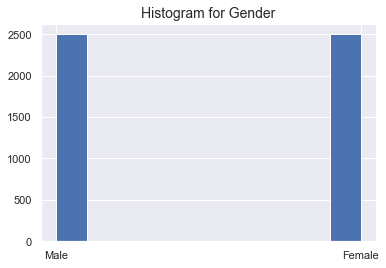

In [6]:
#Plot Gender Histogram
plt.figure()
plt.hist(df1.gender);
plt.title("Histogram for Gender", fontsize =14)
df1.gender.value_counts()

In [7]:
#change gender to numeric male=0, female=1 in new column gender_code
df1['gender_code']=pd.factorize(df1.gender)[0]
df1.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,gender_code
0,1,11.8,6.1,1,0,1,1,Male,0
1,0,14.0,5.4,0,0,1,0,Female,1
2,0,11.8,6.3,1,1,1,1,Male,0
3,0,14.4,6.1,0,1,1,1,Male,0
4,1,13.5,5.9,0,0,0,0,Female,1


In [8]:
df2=df1.copy()
df2.drop(['gender'], axis=1, inplace=True)
df2.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender_code
0,1,11.8,6.1,1,0,1,1,0
1,0,14.0,5.4,0,0,1,0,1
2,0,11.8,6.3,1,1,1,1,0
3,0,14.4,6.1,0,1,1,1,0
4,1,13.5,5.9,0,0,0,0,1


Text(0.5, 1.0, 'Heatmap for Gender Classification Dataset')

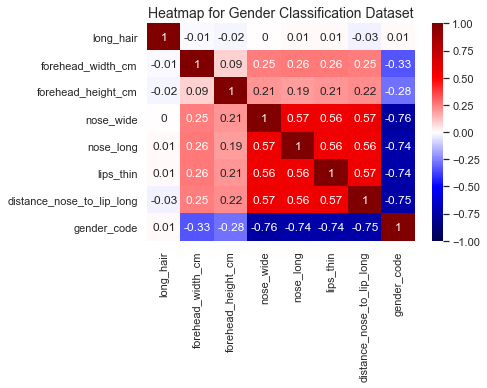

In [9]:
# View the correlations
h=df2.corr().round(2)
sns.heatmap(h, cmap="seismic", annot=True, vmin=-1, vmax=1);
plt.title("Heatmap for Gender Classification Dataset", fontsize =14)

C:\Users\Taghreed Alamri\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Taghreed Alamri\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


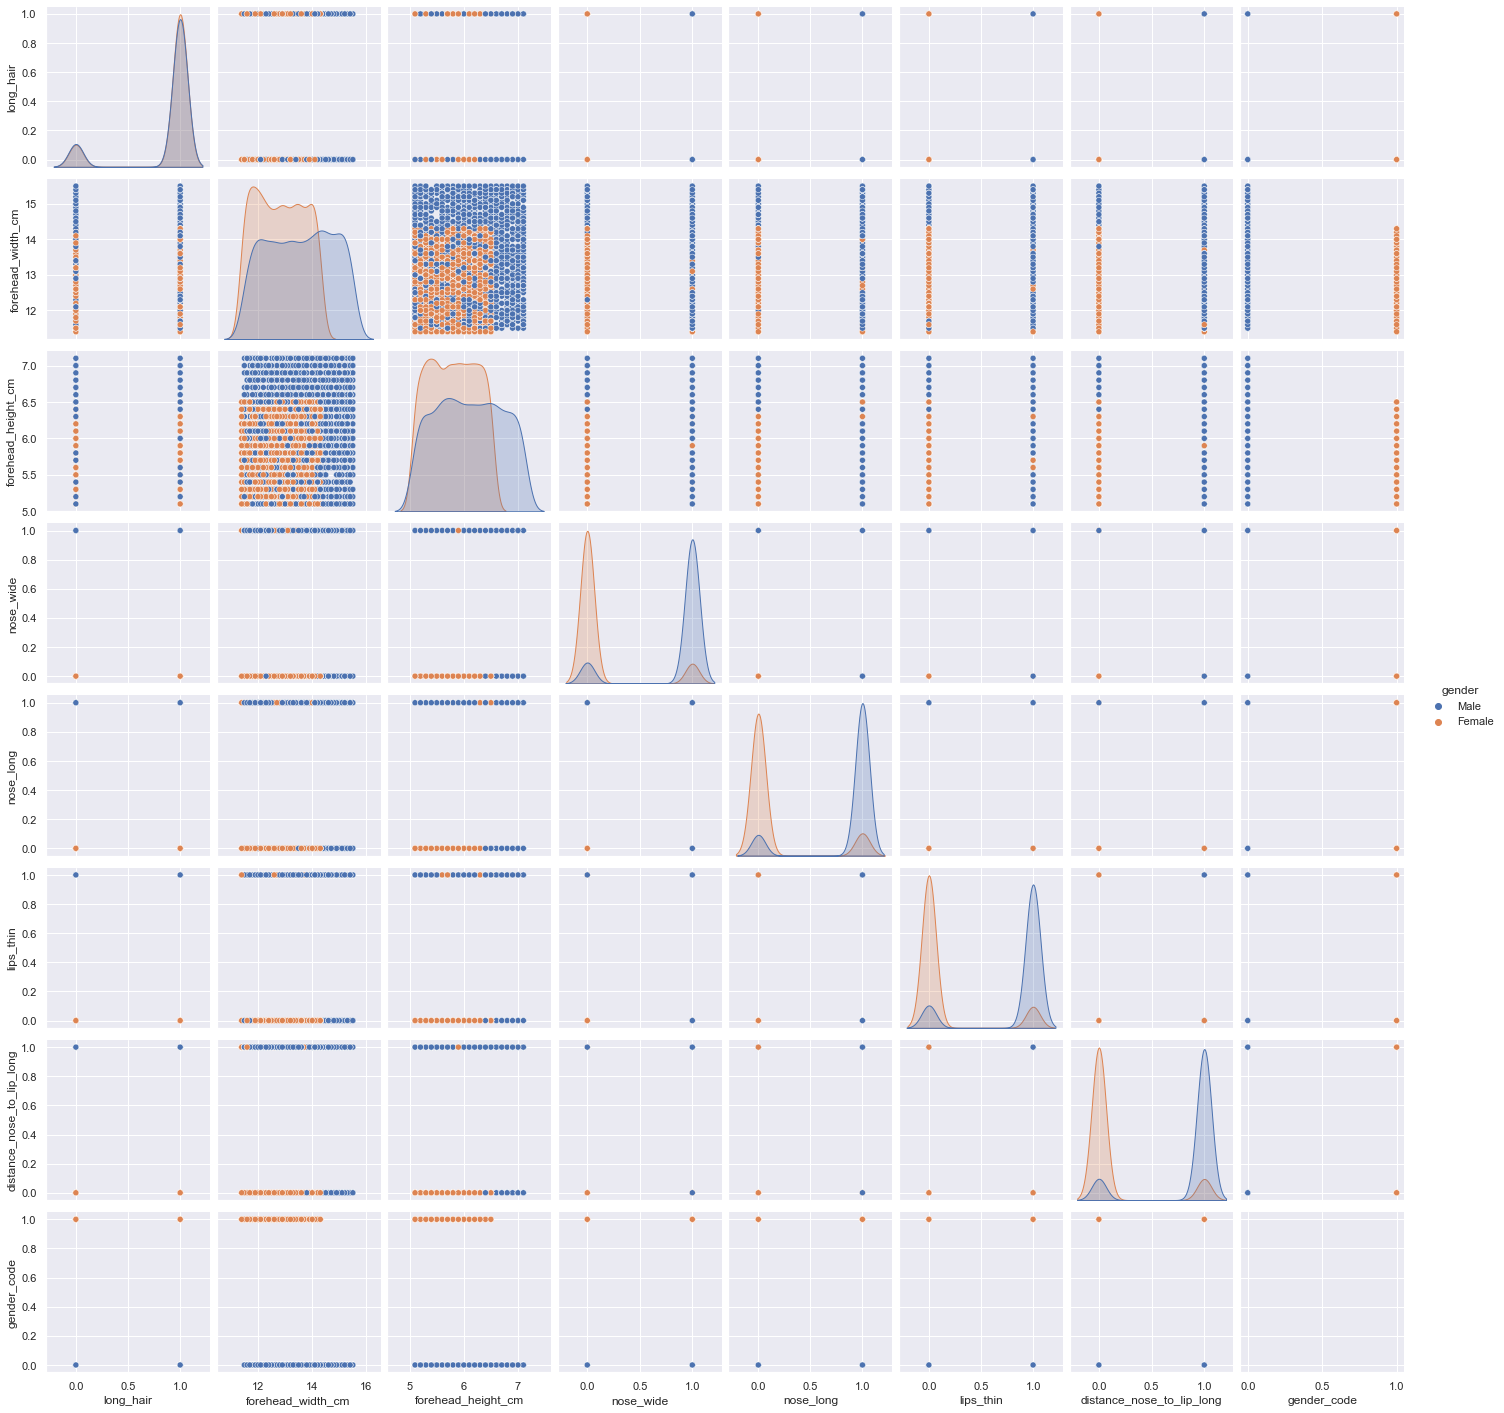

In [10]:
# Plot all of the variable-to-variable relations as scatterplots
sns.pairplot(df1, hue='gender');
plt.savefig('save_as_a_png.png')

Text(0.5, 1.0, 'BoxPlot to Detect Outliers')

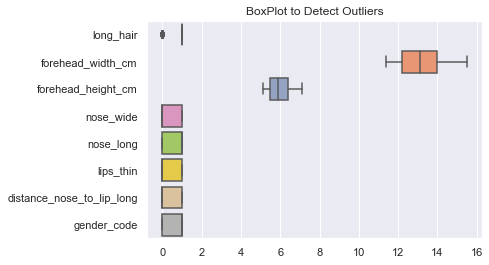

In [11]:
#Plot Boxplot to detect outliers
ax = sns.boxplot(data=df2, orient="h", palette="Set2")
ax.set_title('BoxPlot to Detect Outliers')

In [12]:
# create X (features) and y (response)
X=df2.iloc[:, :7]
y=df2.iloc[:, 7]

In [13]:
# print the shapes of X and y
print(X.shape)
print(y.shape)

(5001, 7)
(5001,)


In [18]:
# STEP 1: split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
#scale the features
std_scale = StandardScaler()
X_train_scaled = std_scale.fit_transform(X_train)
X_test_scaled = std_scale.fit_transform(X_test)

In [19]:
# STEP 2:grid serach with 10-fold cross-validation for KNN parameter tunning (the n_neighbors parameter and weight)
knn = KNeighborsClassifier()
# define the parameter values that should be searched
k_range = list(range(1, 100))
weight_options = ['uniform', 'distance']
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 'weights': ['uniform', 'distance']}


In [20]:
# instantiate and fit the grid
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)
# examine the best model 
print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Best params:  {'n_neighbors': 94, 'weights': 'uniform'}
Best estimator:  KNeighborsClassifier(n_neighbors=94)
Best score:  0.9743333333333333


In [21]:
# test performance for KNN
gs_pred= grid.predict(X_test_scaled)
knn_acc = accuracy_score(y_test, gs_pred)
print('Accuracy of KNeighbors is: {:.2f}%'.format(knn_acc*100))
print(confusion_matrix(y_test, gs_pred))
print(classification_report(y_test, gs_pred))

Accuracy of KNeighbors is: 97.15%
[[969  48]
 [  9 975]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1017
           1       0.95      0.99      0.97       984

    accuracy                           0.97      2001
   macro avg       0.97      0.97      0.97      2001
weighted avg       0.97      0.97      0.97      2001



In [22]:
#STEP 3:grid serach with 10-fold cross-validation for SVM parameter tunning (the Kernel parameter, C and gamma)
#defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf', 'sigmoid', 'linear']} 
grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
#fitting the model for grid search
grid.fit(X_train , y_train)
#print best parameter after tuning
print(grid.best_params_)
#print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=100, gamma=0.01)


In [23]:
# test performance for SVM
grid_predictions = grid.predict(X_test)
svm_acc = accuracy_score(y_test, grid_predictions)
print('Accuracy of SVM is: {:.2f}%'.format(svm_acc*100))
print(confusion_matrix(y_test, grid_predictions))
# print classification report
print(classification_report(y_test, grid_predictions))

Accuracy of SVM is: 96.95%
[[981  36]
 [ 25 959]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1017
           1       0.96      0.97      0.97       984

    accuracy                           0.97      2001
   macro avg       0.97      0.97      0.97      2001
weighted avg       0.97      0.97      0.97      2001



In [24]:
# STEP 4:grid serach with 10-fold cross-validation for LR parameter tunning (the C parameter)
# defining parameter range
param_grid = {'penalty':['l1', 'l2'], 'C':[1,10,100]}
grid = GridSearchCV(LogisticRegression(solver='liblinear') ,param_grid, scoring='accuracy', cv=5)
grid.fit(X_train_scaled, y_train)
# print best parameter after tuning
print(grid.best_params_)
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'penalty': 'l1'}
LogisticRegression(C=10, penalty='l1', solver='liblinear')


In [26]:
# test performance for logistic regression
gs_pred=grid.predict(X_test_scaled)
lr_acc = accuracy_score(y_test, gs_pred)
print('Accuracy of Logistic Regression is: {:.2f}%'.format(lr_acc*100))
print(confusion_matrix(y_test, gs_pred))
print(classification_report(y_test, gs_pred))

Accuracy of Logistic Regression is: 96.45%
[[976  41]
 [ 30 954]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1017
           1       0.96      0.97      0.96       984

    accuracy                           0.96      2001
   macro avg       0.96      0.96      0.96      2001
weighted avg       0.96      0.96      0.96      2001

